In [1]:
!pip install textblob


In [3]:
import pandas as pd
from textblob import TextBlob

data = {
    "Source": [
        "Amazon","Amazon","Amazon","Amazon","Amazon","Amazon","Amazon","Amazon","Amazon","Amazon",
        "Social Media","Social Media","Social Media","Social Media","Social Media","Social Media","Social Media","Social Media","Social Media","Social Media",
        "News","News","News","News","News","News","News","News","News","News"
    ],
    "Text": [
        "The product quality is excellent and worth the price",
        "Very disappointed, the item stopped working in a week",
        "Good value for money and fast delivery",
        "Average product, nothing special about it",
        "Worst purchase I have made online",
        "Packaging was good and product works fine",
        "The quality is poor and not as described",
        "Satisfied with the purchase, would recommend",
        "Not bad but expected better performance",
        "Amazing product, exceeded my expectations",

        "I love this brand so much",
        "Terrible experience with customer service",
        "This update is really useful",
        "Not happy with the recent changes",
        "Feeling excited about the new launch",
        "Worst app update ever",
        "The service is okay, nothing great",
        "Really impressed with the quick response",
        "I am unhappy with how this was handled",
        "Pretty decent experience overall",

        "The government announced a new policy today",
        "Public reaction to the decision has been mixed",
        "The new law received strong criticism",
        "Experts believe the move is beneficial",
        "The announcement was purely informational",
        "Citizens are unhappy with the rising prices",
        "The report highlights economic challenges",
        "Analysts expressed neutral views on the decision",
        "The situation has improved slightly",
        "There was no significant public response"
    ]
}

df = pd.DataFrame(data)
df


,Source,Text
0,Amazon,The product quality is excellent and worth the...
1,Amazon,"Very disappointed, the item stopped working in..."
2,Amazon,Good value for money and fast delivery
3,Amazon,"Average product, nothing special about it"
4,Amazon,Worst purchase I have made online
5,Amazon,Packaging was good and product works fine
6,Amazon,The quality is poor and not as described
7,Amazon,"Satisfied with the purchase, would recommend"
8,Amazon,Not bad but expected better performance
9,Amazon,"Amazing product, exceeded my expectations"


In [4]:
def analyze_sentiment(text):
    analysis = TextBlob(text)
    polarity = analysis.sentiment.polarity
    subjectivity = analysis.sentiment.subjectivity

    if polarity > 0:
        sentiment = "Positive"
    elif polarity < 0:
        sentiment = "Negative"
    else:
        sentiment = "Neutral"

    return pd.Series([sentiment, polarity, subjectivity])

df[["Sentiment", "Polarity", "Subjectivity"]] = df["Text"].apply(analyze_sentiment)
df


,Source,Text,Sentiment,Polarity,Subjectivity
0,Amazon,The product quality is excellent and worth the...,Positive,0.650000,0.550000
1,Amazon,"Very disappointed, the item stopped working in...",Negative,-0.975000,0.975000
2,Amazon,Good value for money and fast delivery,Positive,0.450000,0.600000
3,Amazon,"Average product, nothing special about it",Positive,0.103571,0.485714
4,Amazon,Worst purchase I have made online,Negative,-1.000000,1.000000
5,Amazon,Packaging was good and product works fine,Positive,0.558333,0.550000
6,Amazon,The quality is poor and not as described,Negative,-0.400000,0.600000
7,Amazon,"Satisfied with the purchase, would recommend",Positive,0.500000,1.000000
8,Amazon,Not bad but expected better performance,Positive,0.250000,0.522222
9,Amazon,"Amazing product, exceeded my expectations",Positive,0.600000,0.900000


In [5]:
df["Sentiment"].value_counts()


,count
Sentiment,
Positive,17
Negative,10
Neutral,3


<Axes: title={'center': 'Overall Sentiment Distribution'}, xlabel='Sentiment'>

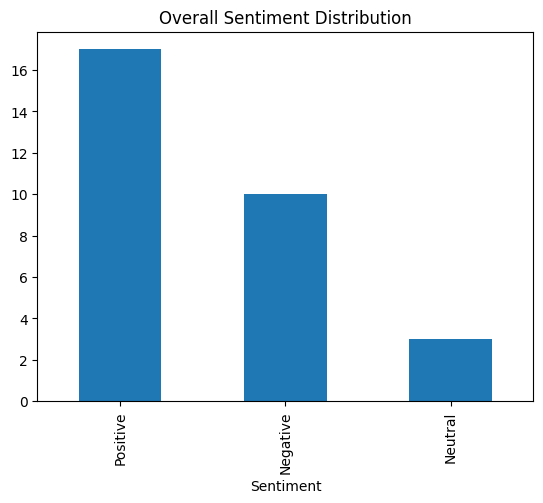

In [6]:
df["Sentiment"].value_counts().plot(kind="bar", title="Overall Sentiment Distribution")


**Public Opinion and Sentiment Patterns**

The sentiment analysis results show a balanced mix of positive, negative, and neutral opinions across different sources. Amazon reviews and social media comments contain more emotionally driven sentiments, reflecting customer satisfaction and dissatisfaction. In contrast, news-related texts are largely neutral and factual, indicating informational content rather than opinion. This variation highlights how sentiment patterns differ based on the nature and source of the text data.

In [7]:
pd.crosstab(df["Source"], df["Sentiment"])


Sentiment,Negative,Neutral,Positive
Source,,,
Amazon,3,0,7
News,3,3,4
Social Media,4,0,6


**Business and Social Insights**

The results of the sentiment analysis can support decision-making in marketing, product development, and social analysis. Negative sentiments in product reviews may indicate quality or service issues that require improvement, while positive sentiments highlight strengths that can be used in promotional strategies. Neutral and mixed responses in news and social media content help organizations understand public awareness and general perception, enabling more informed and data-driven strategies.